# Indirect optimal control of nondimensional inverted pendulum via Pontryagin's minimum principle

In [1]:
from sympy import *
import numpy as np
init_printing()

# State variables

In [2]:
x, v, theta, omega = symbols("x v \\theta, \\omega")
s = Matrix([x, v, theta, omega])
s.T

[x  v  \theta  \omega]

## Control variable

In [3]:
u, us = symbols("u \overline{u}")
u, us

## State equations of motion

In [4]:
ds = Matrix([v, u, omega, sin(theta) - u*cos(theta)])
ds

⎡             v              ⎤
⎢                            ⎥
⎢             u              ⎥
⎢                            ⎥
⎢           \omega           ⎥
⎢                            ⎥
⎣-u⋅cos(\theta) + sin(\theta)⎦

## Homotopic Lagrangian

In [5]:
alpha = symbols("alpha")
L = (1-alpha)*u**2 + alpha*1
L

## Costate variables

In [6]:
l = Matrix([symbols("\\lambda_{}".format(var)) for var in s])
l.T

[\lambdaₓ  \lambdaᵥ  \lambda_\theta  \lambda_\omega]

## Hamiltonian

In [7]:
H = L + l.dot(ds)
H

## Costate equations of motion

In [8]:
dl = -H.diff(s)
dl

⎡                      0                      ⎤
⎢                                             ⎥
⎢                  -\lambdaₓ                  ⎥
⎢                                             ⎥
⎢-\lambda_\omega⋅(u⋅sin(\theta) + cos(\theta))⎥
⎢                                             ⎥
⎣               -\lambda_\theta               ⎦

## Energy optimal control $\alpha \in [0,1)$

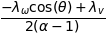

In [9]:
uo = solve(H.diff(u), u)[0]
uo

## Time optimal control $\alpha = 1$

In [10]:
uto = sign(limit(uo, alpha, 1))*us
uto

In [11]:
simplify(uto)